In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from palettable.colorbrewer.qualitative import Pastel1_7
import datetime
from datetime import datetime

%matplotlib inline

In [7]:
newyork = pd.read_csv("./listings.csv", sep=',')

In [8]:
# quiero ver desde cuando son los datos del dataset
newyork['last_review'] = newyork['last_review'].apply(pd.to_datetime)   
newyork.last_review.min()   # esta es la primera reseña

Timestamp('2011-05-12 00:00:00')

In [9]:
newyork.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.32,3,334,0,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.32,2,365,0,NaN
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,201,1,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,520,2022-02-18,3.33,1,154,46,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.77,1,0,0,NaN


In [10]:
newyork.shape

(37631, 18)

In [11]:
#  elimino las columnas license y calculated_host_listings porque no las usaré en el análisis
newyork = newyork.drop(['license', 'calculated_host_listings_count'], axis=1) 

In [12]:
newyork.nunique()

id                       37631
name                     36198
host_id                  24825
host_name                 8999
neighbourhood_group          5
neighbourhood              223
latitude                 18325
longitude                15385
room_type                    4
price                      884
minimum_nights             115
number_of_reviews          438
last_review               2550
reviews_per_month          836
availability_365           366
number_of_reviews_ltm      149
dtype: int64

In [13]:
newyork.describe(include='all')

/var/folders/wx/274cwf0567bfr403dd670hhr0000gn/T/ipykernel_24395/2804797411.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  newyork.describe(include='all')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
count,3.763100e+04,37617,3.763100e+04,37544,37631,37631,37631.000000,37631.000000,37631,37631.000000,37631.000000,37631.000000,28657,28657.000000,37631.000000,37631.000000
unique,NaN,36198,NaN,8999,5,223,NaN,NaN,4,NaN,NaN,NaN,2550,NaN,NaN,NaN
top,NaN,Well-kept apartment home | 1BR in New York,NaN,Blueground,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-02-27 00:00:00,NaN,NaN,NaN
freq,NaN,41,NaN,332,16086,2825,NaN,NaN,20362,NaN,NaN,NaN,685,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-12 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-30 00:00:00,NaN,NaN,NaN
mean,2.082548e+16,NaN,1.223235e+08,NaN,NaN,NaN,40.728692,-73.946879,NaN,166.224682,20.496638,24.663044,NaN,1.049115,129.085674,6.046743
std,1.056299e+17,NaN,1.366461e+08,NaN,NaN,NaN,0.056503,0.052921,NaN,306.763703,29.323780,52.871878,NaN,1.795620,140.624717,16.838760
min,2.595000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.504560,-74.249840,NaN,0.000000,1.000000,0.000000,NaN,0.010000,0.000000,0.000000
25%,1.415543e+07,NaN,1.204847e+07,NaN,NaN,NaN,40.688485,-73.983020,NaN,68.000000,2.000000,1.000000,NaN,0.120000,0.000000,0.000000


In [14]:
newyork['last_review'].isnull().any()

True

In [67]:
# VEO EN QUÉ COLUMNAS HAY NULOS
newyork.isnull().sum()

id                          0
name                       14
host_id                     0
host_name                  87
neighbourhood_group         0
neighbourhood               0
latitude                    0
longitude                   0
room_type                   0
price                       0
minimum_nights              0
number_of_reviews           0
last_review              8974
reviews_per_month        8974
availability_365            0
number_of_reviews_ltm       0
dtype: int64

In [66]:
# reemplazo los valores nulos de los precios por la media de los precios de la columna
newyork['price'] = newyork['price'].replace(0,np.median(newyork['price']))

223


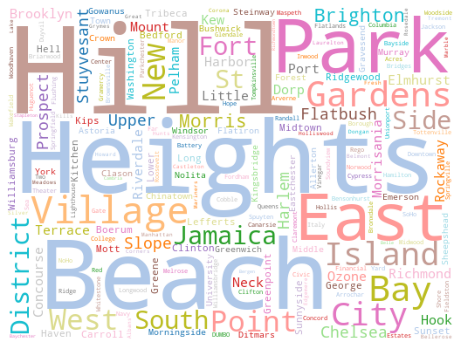

In [18]:
# NOMBRE DE TODOS LOS BARRIOS
print(newyork.neighbourhood.nunique()) 
nombre_barrios= newyork.neighbourhood.unique() 

# hago visualización de todos los nombre de barrio
plt.subplots(figsize=(8,8))       
wordcloud = WordCloud(
            background_color='white', 
            width=512,               
            height=384,  colormap='tab20',).generate("  ".join(nombre_barrios)) 
plt.imshow(wordcloud)
plt.axis('off');      
plt.savefig('./img/nombre_barrios_nw.png') 

                     index  neighbourhood
0                  Concord              9
1              Marble Hill              9
2               Mill Basin              9
3            Midland Beach              9
4               West Farms              8
5              Grymes Hill              8
6               Douglaston              8
7          Manhattan Beach              8
8               Mount Eden              7
9                Navy Yard              7
10                 Oakwood              7
11           Port Richmond              7
12       Castleton Corners              7
13            Emerson Hill              6
14      Westchester Square              6
15                Woodlawn              6
16          Spuyten Duyvil              6
17            Dongan Hills              5
18              Holliswood              5
19                Rosebank              5
20         New Springville              5
21               Fieldston              5
22              Co-op City        

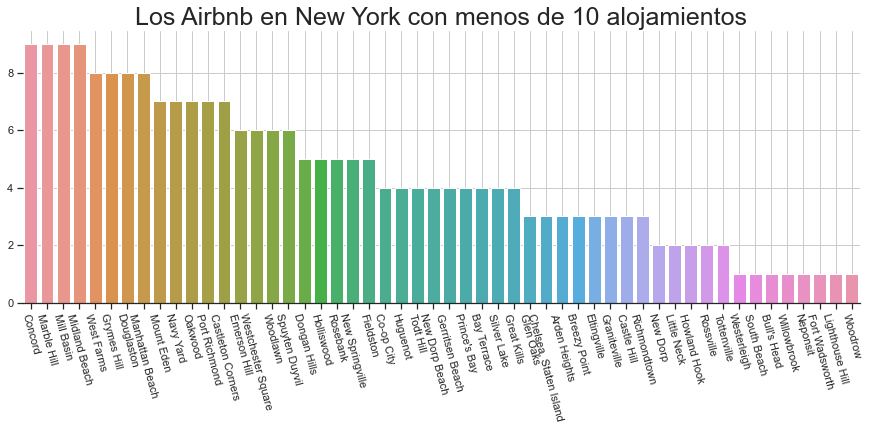

In [69]:
# quiero saber cuales son los barrios menos concurrentes en Airbnb
barrio_menos_recurrente = newyork['neighbourhood'].value_counts()
barrio_menos_recurrente = barrio_menos_recurrente[barrio_menos_recurrente < 10]
df =pd.DataFrame(barrio_menos_recurrente).reset_index()
print(df)
plt.figure(figsize=(15, 5))
sns.barplot(x = df['index'], y = df['neighbourhood'], data = df)
plt.xticks(rotation = -75)
sns.despine(left = True)
plt.title('Los Airbnb en New York con menos de 10 alojamientos', size=25)
plt.xlabel('')
plt.ylabel('')
plt.grid();
plt.savefig('./img/barrio_menos_concurrente_10_nw.png')

                index  neighbourhood
0  Bedford-Stuyvesant           2825
1        Williamsburg           2399
2              Harlem           1847
3      Hell's Kitchen           1709
4            Bushwick           1660
5             Midtown           1613
6     Upper West Side           1426
7     Upper East Side           1288
8       Crown Heights           1194
9        East Village           1051


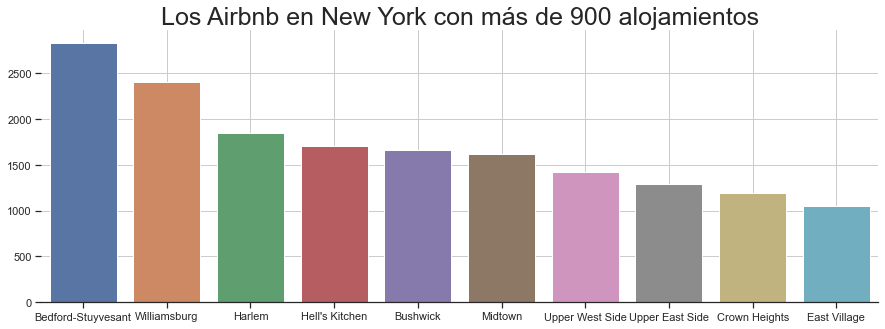

In [70]:
#Los barrios con mas Airbnbs
barrio_mas_recurrente = newyork['neighbourhood'].value_counts()
barrio_mas_recurrente = barrio_mas_recurrente[barrio_mas_recurrente > 900]
df =pd.DataFrame(barrio_mas_recurrente).reset_index()
print(df)

plt.figure(figsize=(15, 5))
sns.barplot(x = df['index'], y = df['neighbourhood'], data = df)
plt.xticks()
sns.despine(left = True)
plt.title('Los Airbnb en New York con más de 900 alojamientos', size=25)
plt.xlabel('')
plt.ylabel('')
plt.grid();
plt.savefig('./img/barrio_mas_concurrente_ny.png')

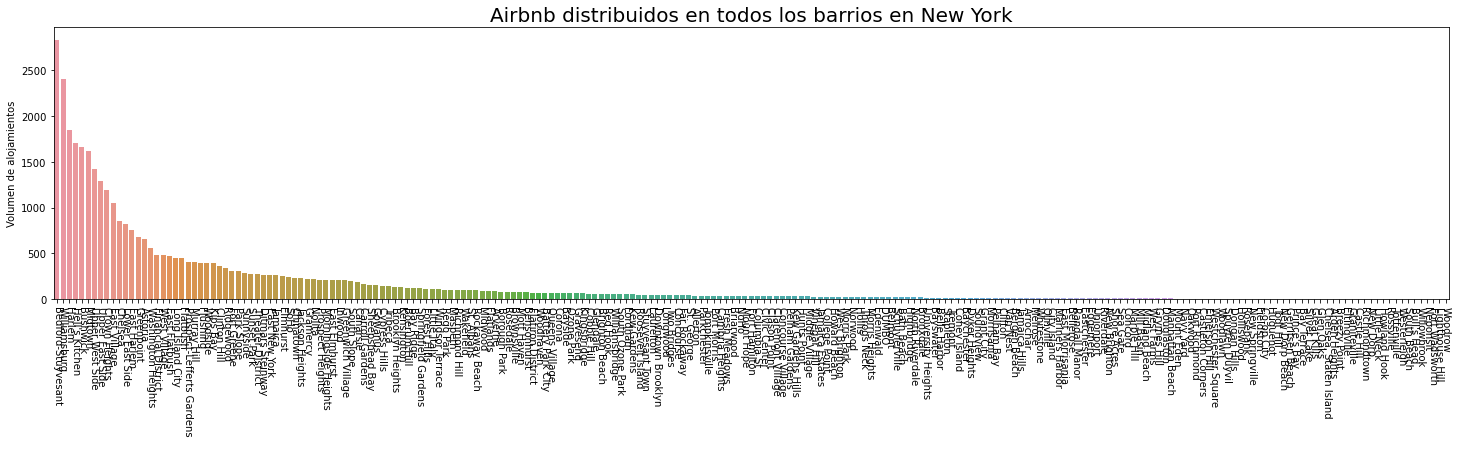

In [23]:
# Visualización de todos los barrios en general
plt.figure(figsize=(25, 5))
sns.countplot(x = 'neighbourhood', data=newyork, order = newyork['neighbourhood'].value_counts().index)

plt.title("Airbnb distribuidos en todos los barrios en New York", fontsize= 20)
plt.xlabel(" ")
plt.ylabel("Volumen de alojamientos")
plt.xticks(rotation = -90);
plt.savefig('./img/alojamiento_por_barrios_10_nw.png') 

Analizando los distritos


5


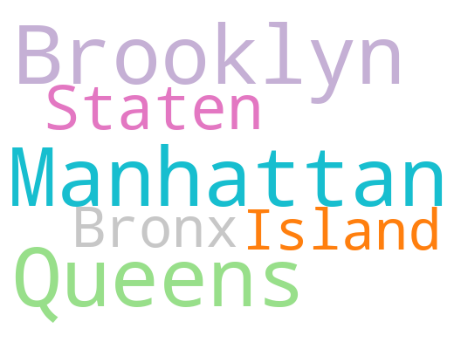

In [24]:
# NOMBRE DE TODOS LOS distritos
print(newyork.neighbourhood_group.nunique()) 
nombre_distritos= newyork.neighbourhood_group.unique() 

# VISUALIZACIÓN NOMBRES DISTRITOS
plt.subplots(figsize=(8,8))      
wordcloud = WordCloud(
                          background_color='white',   
                          width=512,                
                          height=384,  colormap='tab20',
                         ).generate("  ".join(nombre_distritos))   
plt.imshow(wordcloud)
plt.axis('off');   
plt.savefig('./img/nombre_distritos_ny.png') 

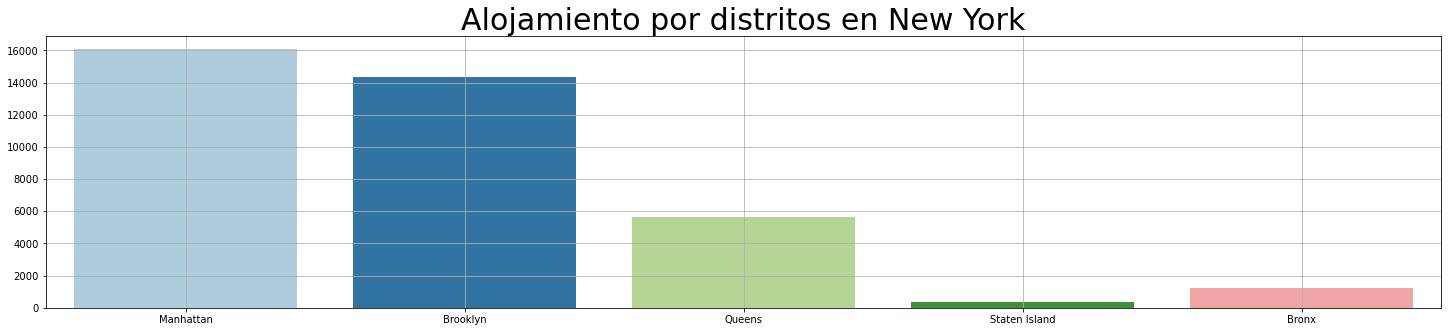

In [25]:
# quiero ver como están distribuidos los Airbnb en los distritos

plt.figure(figsize=(25, 5))
sns.countplot(x = 'neighbourhood_group', data=newyork, palette='Paired')
plt.title("Alojamiento por distritos en New York", fontsize= 30)
plt.xlabel("Distritos")
plt.ylabel("Volumen de alojamientos")
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.savefig('./img/alojamiento_por_distritos_nw.png')

In [26]:
# visualizo
newyork.neighbourhood_group.value_counts()

Manhattan        16086
Brooklyn         14367
Queens            5640
Bronx             1203
Staten Island      335
Name: neighbourhood_group, dtype: int64

In [ ]:
# quiero empezar a analizar los precios

In [28]:
d = newyork.groupby('neighbourhood_group')[['price']].mean().reset_index()
d

,neighbourhood_group,price
0,Bronx,105.039900
1,Brooklyn,134.904155
2,Manhattan,218.408989
3,Queens,113.591844
4,Staten Island,121.877612


  neighbourhood_group  price
4       Staten Island     33
0               Bronx     11
1            Brooklyn     10
2           Manhattan     10
3              Queens     10


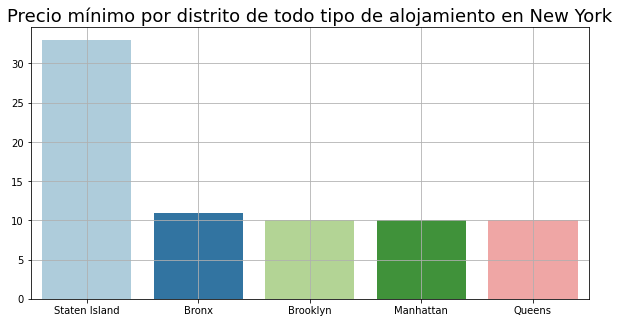

In [29]:
# quiero ver el precio mínimo por distrito, independiente del tipo de alojamiento
d = newyork.groupby('neighbourhood_group')[['price']].min().reset_index().sort_values(by=['price'], ascending=False)  
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.title('Precio mínimo por distrito de todo tipo de alojamiento en New York', fontsize= 18);
plt.savefig('./img/precio_min_distrito_nw.png') 

  neighbourhood_group  price
2           Manhattan  10000
3              Queens  10000
1            Brooklyn   7184
0               Bronx   2000
4       Staten Island   1200


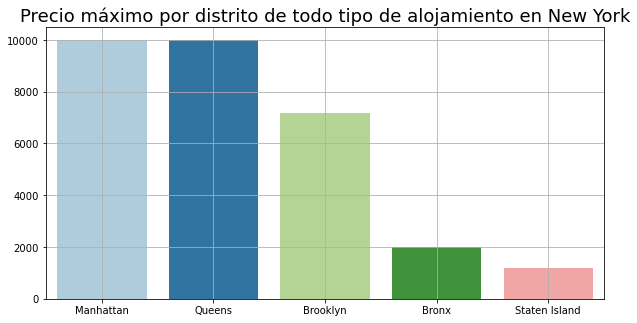

In [30]:
# PRECIO MAXIMO POR DISTRITO
d = newyork.groupby('neighbourhood_group')[['price']].max().reset_index().sort_values(by=['price'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.title('Precio máximo por distrito de todo tipo de alojamiento en New York', fontsize= 18);
plt.savefig('./img/precio_max_distrito_todos_aloj_nw.png') 

In [31]:
newyork.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
count,3.763100e+04,3.763100e+04,37631.000000,37631.000000,37631.000000,37631.000000,37631.000000,28657.000000,37631.000000,37631.000000
mean,2.082548e+16,1.223235e+08,40.728692,-73.946879,166.334804,20.496638,24.663044,1.049115,129.085674,6.046743
std,1.056299e+17,1.366461e+08,0.056503,0.052921,306.724111,29.323780,52.871878,1.795620,140.624717,16.838760
min,2.595000e+03,2.438000e+03,40.504560,-74.249840,10.000000,1.000000,0.000000,0.010000,0.000000,0.000000
25%,1.415543e+07,1.204847e+07,40.688485,-73.983020,69.000000,2.000000,1.000000,0.120000,0.000000,0.000000
50%,3.366773e+07,5.177239e+07,40.724690,-73.953880,112.000000,30.000000,4.000000,0.440000,66.000000,0.000000
75%,4.893624e+07,2.099219e+08,40.762215,-73.927845,180.000000,30.000000,22.000000,1.430000,275.000000,4.000000
max,5.751276e+17,4.477881e+08,40.916970,-73.705220,10000.000000,1250.000000,1024.000000,90.000000,365.000000,849.000000


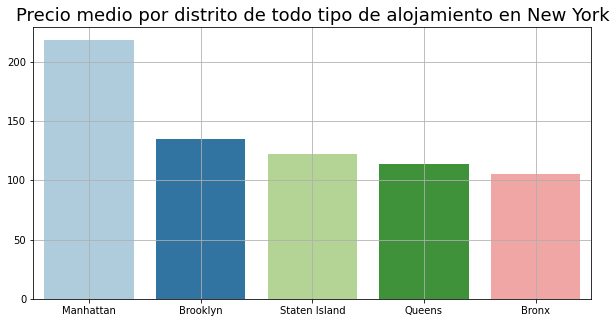

In [32]:
# VISUALIZACIÓN POR DISTRITO LA MEDIA DE LOS PRECIOS
d = newyork.groupby('neighbourhood_group')[['price']].mean().reset_index().sort_values(by=['price'], ascending=False) 
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.title('Precio medio por distrito de todo tipo de alojamiento en New York', fontsize= 18);
plt.savefig('./img/precio_media_distrito_nw.png') 

/var/folders/wx/274cwf0567bfr403dd670hhr0000gn/T/ipykernel_24395/1713583034.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  precio_min_distrito= precio_distrito.min()['price']
/var/folders/wx/274cwf0567bfr403dd670hhr0000gn/T/ipykernel_24395/1713583034.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  precio_max_distrito= precio_distrito.max()['price']


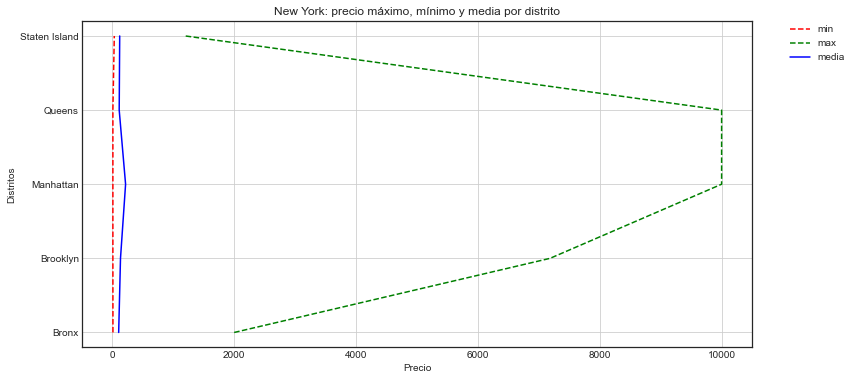

In [33]:
# precios maximos, minimos y media por distrito
precio_distrito = newyork.groupby('neighbourhood_group')
precio_min_distrito= precio_distrito.min()['price']
precio_distrito = newyork.groupby('neighbourhood_group')
precio_max_distrito= precio_distrito.max()['price']
precio_distrito = newyork.groupby('neighbourhood_group')
precio_mean_distrito= precio_distrito.mean()['price']

plt.style.use("seaborn-white")
plt.figure(figsize=(12,6)) 
plt.plot(precio_min_distrito, precio_min_distrito.index, linestyle = "--", color="r", label = "min")
plt.plot(precio_max_distrito, precio_max_distrito.index, linestyle = "--", color="g", label = "max")
plt.plot(precio_mean_distrito, precio_mean_distrito.index, linestyle = "-", color="b", label = "media")
plt.title("New York: precio máximo, mínimo y media por distrito")
plt.xlabel("Precio")
plt.ylabel("Distritos")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('./img/junto_min_max_precio_distrito_nw.png') 

In [ ]:
# ahora quiero analizar los diferentes tipos de alojamientos

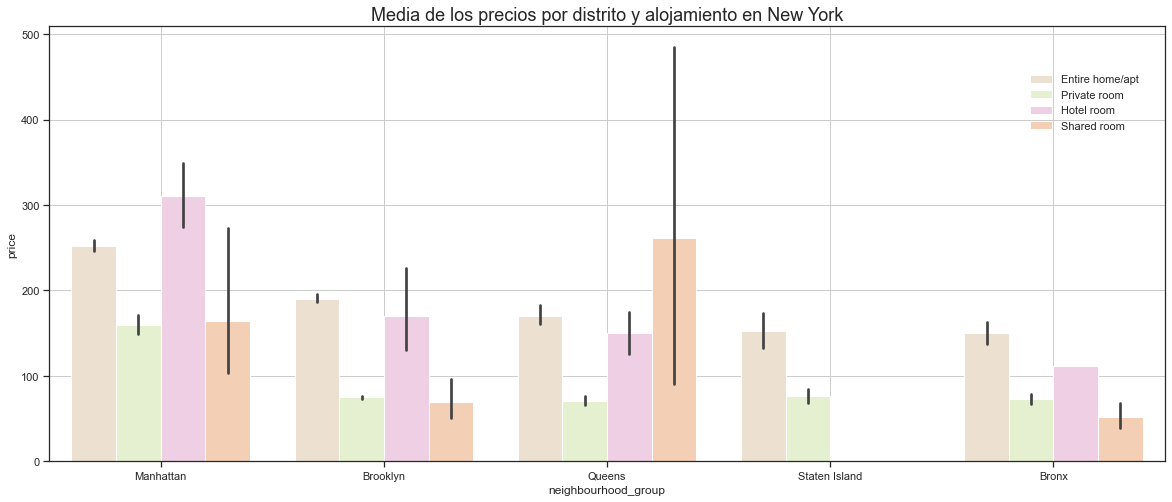

In [71]:
# visualizo agrupo por los distintos apartamentos y diferentes alojamientos la media de los precios, no la he usado en la presentación
plt.figure(figsize=(20, 8))
sns.barplot(x="neighbourhood_group", y="price", hue= 'room_type', data=newyork, palette='Pastel2_r')  
plt.grid()
plt.legend(bbox_to_anchor=(1., .95), loc='upper right', borderaxespad=2.)
plt.title('Media de los precios por distrito y alojamiento en New York', fontsize= 18);
plt.savefig('./img/media_precio_distrito_alojamiento_nw.png')

In [36]:
newyork.room_type.value_counts()

Entire home/apt    20362
Private room       16500
Shared room          571
Hotel room           198
Name: room_type, dtype: int64

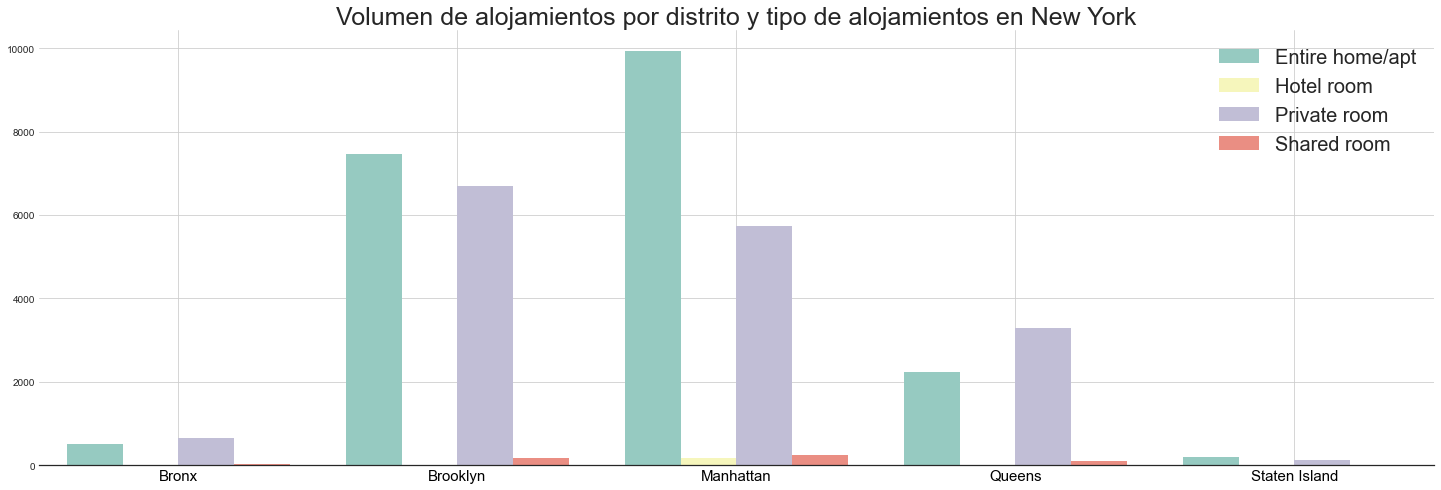

In [37]:
# quiero ver por distrito que tipo de apartamento hay más, asegurarme de que está bien
# agrupo por tipo de habitación, tipo de distrito y usaré de referencia el host_id porque lo que devuelve es numerico no como el host name, pruebas
apartamento_por_distrito = pd.DataFrame(newyork[['host_id','room_type','neighbourhood_group']].groupby(['neighbourhood_group','room_type']).host_id.count().reset_index())
apartamento_por_distrito
plt.figure(figsize=(25, 8))
sns.barplot( x="neighbourhood_group", y="host_id", data=apartamento_por_distrito, hue ='room_type', palette='Set3')
plt.grid()
plt.title('Volumen de alojamientos por distrito y tipo de alojamientos en New York', size=25)
plt.legend(loc="upper right",  fontsize= 20)
sns.despine(left = True)
plt.xticks(size=15, color= 'k')
plt.xlabel('')
plt.ylabel('')
# sns.despine(left = True);
plt.savefig('./img/volumen_alojamiento_distrito_nw.png') # se guarda la imagen

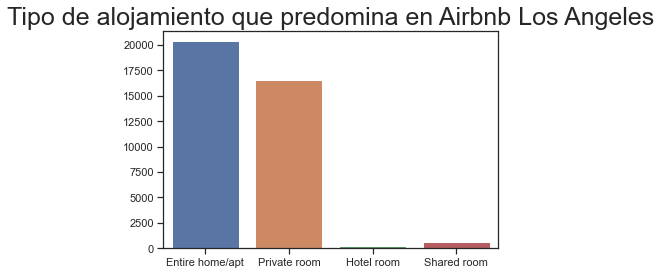

In [72]:
# visualizo qué tipo de alojamiento hay más
sns.countplot(x = 'room_type', data=newyork)
plt.xlabel('')
plt.ylabel('')
plt.title('Tipo de alojamiento que predomina en Airbnb Los Angeles', size=25);
plt.savefig('./img/volumen_alojamiento_distrito_ny.png') 

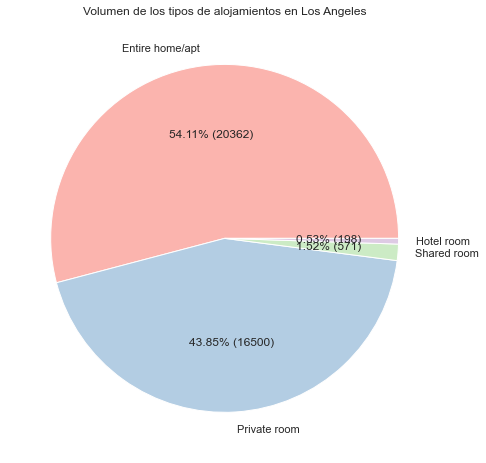

In [73]:
# QUE TIPO DE ALOJAMIENTO HAY MÁS, EL QUE MÁS HAY ES APARTAMENTO ENTERO, otra forma de ver el de ariba no la voy a usar
tipo_apartamento = newyork['room_type'].value_counts()

def autopct_fun(abs_values): 
    val = iter(abs_values)
    return lambda pct: f"{pct:.2f}% ({next(val)})"
counts = tipo_apartamento
my_circle=plt.Circle( (0,0), 0.5, color='white')  
plt.figure(figsize=(8,8))
plt.pie(tipo_apartamento.values,labels=tipo_apartamento.index, autopct=autopct_fun(counts), colors=Pastel1_7.hex_colors)
plt.title("Volumen de los tipos de alojamientos en Los Angeles");
#plt.savefig('max_alojamiento_distrito.png') 

In [40]:
# observo las descripciones general de los precios
newyork.price.describe()

count    37631.000000
mean       166.334804
std        306.724111
min         10.000000
25%         69.000000
50%        112.000000
75%        180.000000
max      10000.000000
Name: price, dtype: float64

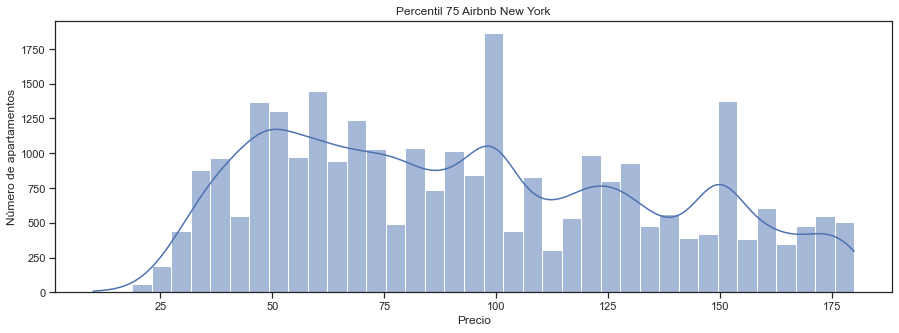

In [74]:
# Visualizo como está distribuido el percentil 75
inferior_150 = newyork[newyork['price']<=180] 
plt.figure(figsize=(15,5))
sns.histplot(x='price', data=inferior_150, kde=True, palette='Pastel2_r')
plt.title('Percentil 75 Airbnb New York')
plt.xlabel("Precio")
plt.ylabel("Número de apartamentos")
plt.savefig('./img/alojamientos_precio_percentil_ny.png') 

         room_type       price
1       Hotel room  295.742424
0  Entire home/apt  216.920342
3      Shared room  145.201401
2     Private room  103.087636


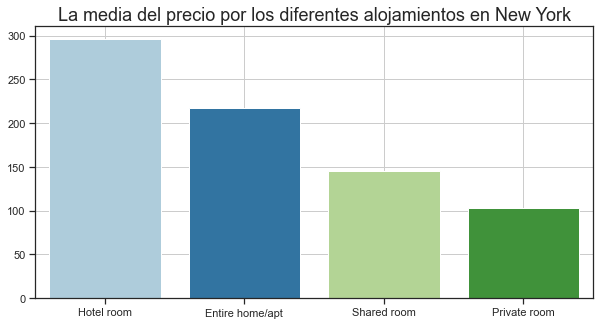

In [76]:
# quiero ver el precio media por los diferentes tipos de alojamientos
d = newyork.groupby('room_type')[['price']].mean().reset_index().sort_values(by=['price'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('La media del precio por los diferentes alojamientos en New York', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/precio_medio_por_alojamiento_ny.png')

In [43]:
newyork.price.describe()

count    37631.000000
mean       166.334804
std        306.724111
min         10.000000
25%         69.000000
50%        112.000000
75%        180.000000
max      10000.000000
Name: price, dtype: float64

         room_type  price
0  Entire home/apt  10000
2     Private room  10000
3      Shared room  10000
1       Hotel room   1600


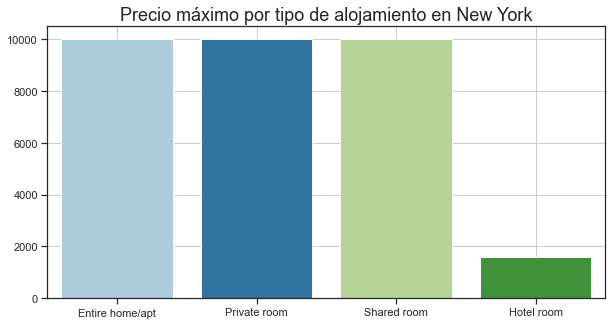

In [77]:
# quiero ver el precio máximo por alojamiento
d = newyork.groupby('room_type')[['price']].max().reset_index().sort_values(by=['price'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('Precio máximo por tipo de alojamiento en New York', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/precio_max_por_alojamiento_ny.png')

         room_type  price
0  Entire home/apt     10
2     Private room     10
3      Shared room     15
1       Hotel room    100


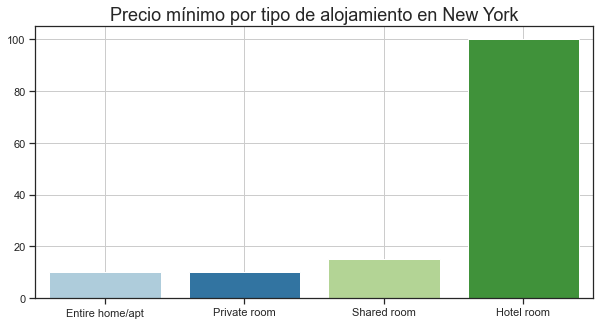

In [78]:
# quiero ver el precio mínimo por alojamiento
d = newyork.groupby('room_type')[['price']].min().reset_index().sort_values(by=['price'])
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('Precio mínimo por tipo de alojamiento en New York', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/precio_min_por_alojamiento_ny.png') 

/Users/lauragarciasanchez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


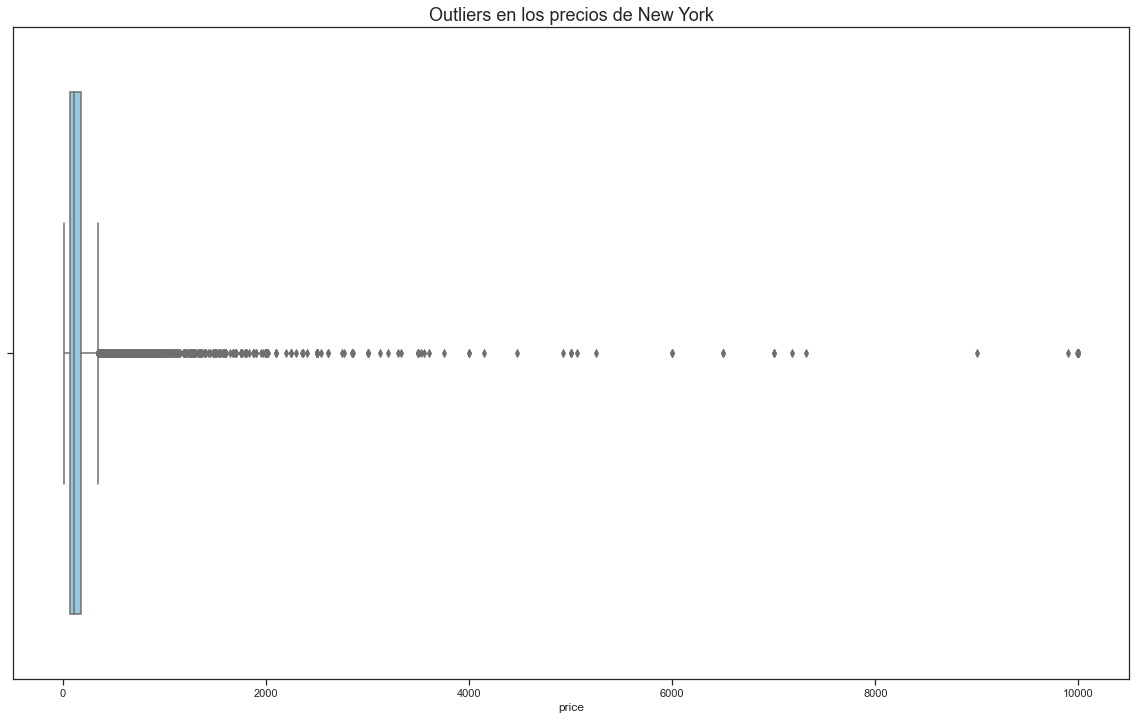

In [79]:
# outliers de los precios
plt.figure(figsize=(20,12))
sns.boxplot(newyork['price'], color= 'skyblue')
plt.title('Outliers en los precios de New York', fontsize= 18);
plt.savefig('./img/media_precio_boxplot_ny.png') 

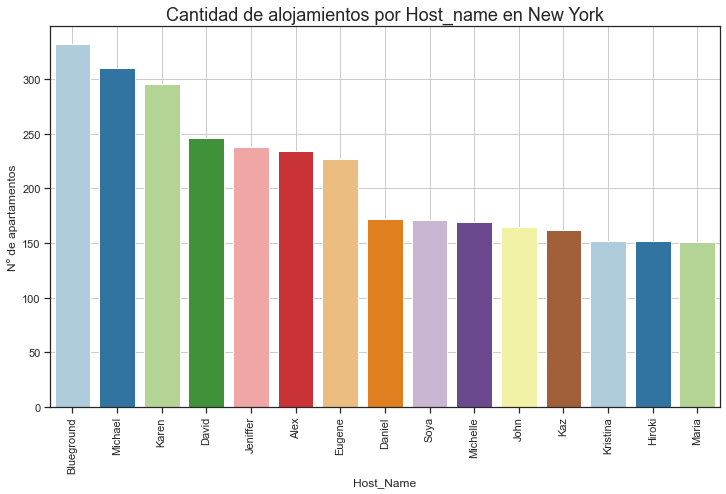

In [80]:
# Visualizo en con el host_name cuantos apartamentos tiene cada uno de ellos, no me sale de otra manera no se xk
host_name_apartamentos = pd.DataFrame({'Host_Name':newyork['host_name'].value_counts(ascending=False).index,
                               'Nº de apartamentos': newyork['host_name'].value_counts(ascending=False).values})[:15]

plt.figure(figsize=(12,7))
sns.barplot(x='Host_Name', y='Nº de apartamentos', data = host_name_apartamentos, palette='Paired')
plt.title('Cantidad de alojamientos por Host_name en New York', fontsize= 18)
plt.xticks(rotation = 90)
plt.grid()
plt.savefig('alojamientos_host_name_ny.png') 

  neighbourhood_group  availability_365
4       Staten Island        195.149254
0               Bronx        188.278470
3              Queens        155.281560
2           Manhattan        125.737287
1            Brooklyn        116.054221


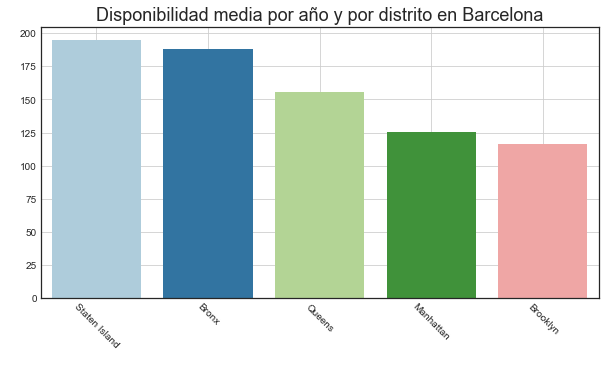

In [49]:
# quiero ver la disponibilidad media por distrito
d = newyork.groupby('neighbourhood_group')[['availability_365']].mean().reset_index().sort_values(by=['availability_365'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot( x="neighbourhood_group",y="availability_365", data=d, palette='Paired' )
plt.grid()
plt.ylabel(" ")
plt.xlabel(" ")
plt.xticks(rotation = -45);
plt.title('Disponibilidad media por año y por distrito en Barcelona', fontsize= 18);

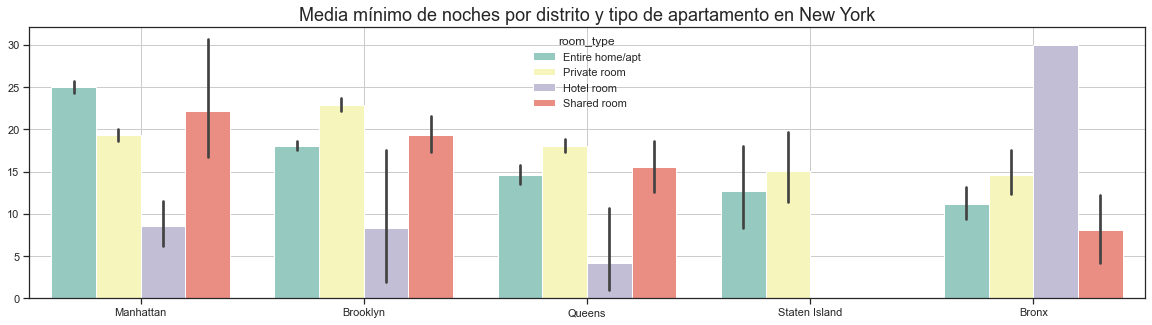

In [82]:
# quiero saber por tipo de apartamento y en que distrito, lo minimo que piden por noche
plt.figure(figsize=(20, 5))
sns.barplot( x="neighbourhood_group",y="minimum_nights", hue = 'room_type',data=newyork, palette='Set3')
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.title('Media mínimo de noches por distrito y tipo de apartamento en New York', fontsize= 18);
plt.savefig('./img/minnoches_distrito_room_type_ny.png')

In [ ]:
# quiero analizar las reseñas

In [53]:
d = newyork.groupby('neighbourhood_group', )[['number_of_reviews']].sum().reset_index().sort_values(by=['number_of_reviews'], ascending=False)
d 

,neighbourhood_group,number_of_reviews
1,Brooklyn,391103
2,Manhattan,326083
3,Queens,164626
0,Bronx,33383
4,Staten Island,12900


  neighbourhood_group  number_of_reviews
1            Brooklyn             391103
2           Manhattan             326083
3              Queens             164626
0               Bronx              33383
4       Staten Island              12900
928095


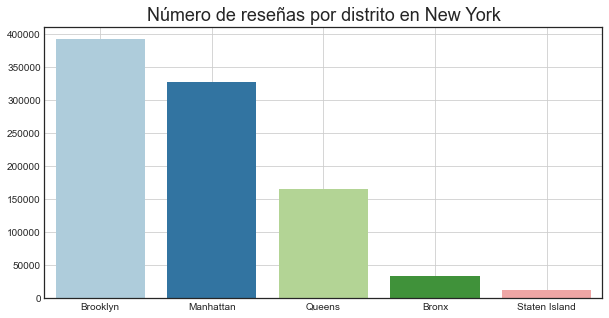

In [54]:
# quiero saber el número máximo de resellas por distrito
d = newyork.groupby('neighbourhood_group', )[['number_of_reviews']].sum().reset_index().sort_values(by=['number_of_reviews'], ascending=False)
print(d) 
print(newyork.number_of_reviews.sum())
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="number_of_reviews", data=d, palette='Paired')
plt.title('Número de reseñas por distrito en New York', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/reseñas_sum_distrito_ny.png') 

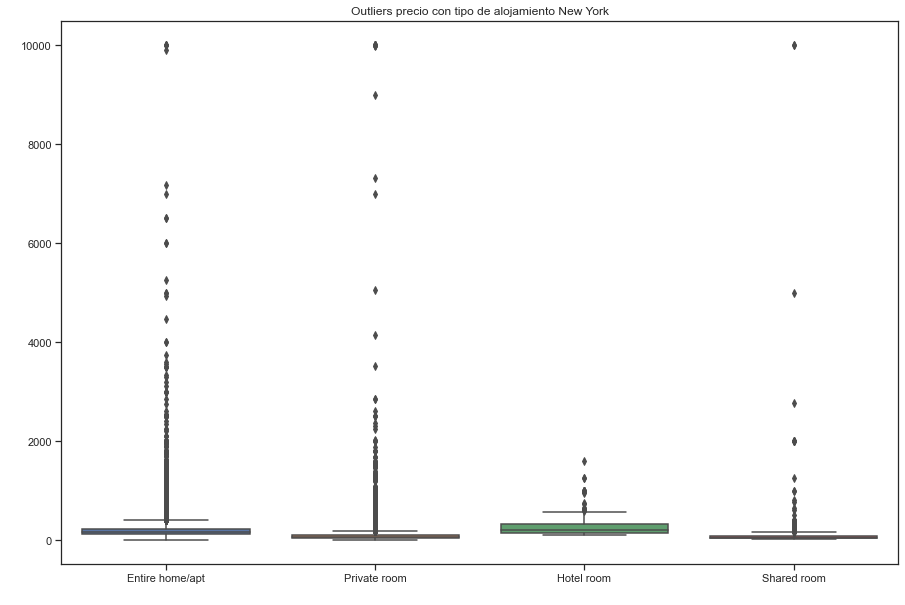

<Figure size 432x288 with 0 Axes>

In [83]:
# outliers precio por tipo de alojamiento
plt.figure(figsize=(15,10))
sns.boxplot(data=newyork, x='room_type', y='price')
plt.title('Outliers precio con tipo de alojamiento New York')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()
plt.savefig('./img/outlier_precio_room_type_ny.png') 

# Mapas

In [58]:
import folium

In [59]:
# preparo dataframe para hacer el mapa por barrios
lat = pd.pivot_table(newyork, index= 'neighbourhood', values='latitude').reset_index()
print(lat)
lon = pd.pivot_table(newyork, index= 'neighbourhood', values='longitude').reset_index()
print(lon)
mapa_barrios = pd.merge(lat, lon)

       neighbourhood   latitude
0           Allerton  40.864372
1      Arden Heights  40.557493
2           Arrochar  40.591613
3            Arverne  40.592515
4            Astoria  40.764366
..               ...        ...
218  Windsor Terrace  40.655082
219        Woodhaven  40.692068
220         Woodlawn  40.900192
221          Woodrow  40.537770
222         Woodside  40.745025

[223 rows x 2 columns]
       neighbourhood  longitude
0           Allerton -73.859830
1      Arden Heights -74.180980
2           Arrochar -74.070476
3            Arverne -73.794442
4            Astoria -73.920204
..               ...        ...
218  Windsor Terrace -73.978529
219        Woodhaven -73.858028
220         Woodlawn -73.865992
221          Woodrow -74.206740
222         Woodside -73.900221

[223 rows x 2 columns]


In [60]:
# preparo dataframe para hacer el mapa por barrios
lat = pd.pivot_table(newyork, index= 'neighbourhood_group', values='latitude').reset_index()
#print(lat)
lon = pd.pivot_table(newyork, index= 'neighbourhood_group', values='longitude').reset_index()
#print(lon)
mapa_distritos = pd.merge(lat, lon)
print(mapa_distritos)

  neighbourhood_group   latitude  longitude
0               Bronx  40.850617 -73.881750
1            Brooklyn  40.681971 -73.949268
2           Manhattan  40.764407 -73.975421
3              Queens  40.726743 -73.863865
4       Staten Island  40.612401 -74.105363


In [61]:
bronx = mapa_distritos[mapa_distritos['neighbourhood_group']=='Bronx']
bronx = [40.850617, -73.881750]


In [62]:
map_geojson = folium.Map(location=[40.764407, -73.975421], zoom_start=11, width="%100",height="%100") # asi se crea el mapa
mapa = folium.GeoJson("./neighbourhoods.geojson", name= "geojson airbnb").add_to(map_geojson)
folium.LayerControl().add_to(map_geojson)
mapa.save("./img/Mapa_geojson_general_nw.htlm")
map_geojson

In [63]:
# visualizo todo el mapa de Seattle con los distritos marcados 
map_geojson = folium.Map(location=[40.764407, -73.975421], zoom_start=12,  width="%100",height="%100")
mapa = folium.GeoJson("./neighbourhoods.geojson", name= "geojson airbnb").add_to(map_geojson)
folium.LayerControl().add_to(map_geojson)

for (index, row) in mapa_distritos.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood_group"],
    tooltip = "click").add_to(map_geojson)

mapa.save("./img/Mapa_geojson_distritos_ny.htlm")
mapa.save("Mapa_geojson.jpg");
map_geojson

In [84]:
# VIsualización por distritos
mapa_distritos
map_dist = folium.Map(location=[40.764407, -73.975421], zoom_start=12, width="%100",height="%100")

for (index, row) in mapa_distritos.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood_group"],
    tooltip = "click").add_to(map_dist)
mapa.save("./img/mapas/Mapa_geojson_distritos_ny_tierra.htlm") 
map_dist

In [65]:
# mapa con todos los barrios
map_barrios = folium.Map(location=[40.764407, -73.975421], zoom_start=12, width="%100",height="%100")

for (index, row) in mapa_barrios.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood"],
    tooltip = "click").add_to(map_barrios)
mapa.save("./img/mapas/mapa_barrios_ny.htlm")
map_barrios